In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('housing.data', header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS',
              'NOX', 'RM', 'AGE', 'DIS', 'RAD',
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [3]:
X = df[['RM']].values
y = df['MEDV'].values

In [4]:
from sklearn.preprocessing import StandardScaler
import numpy as np

In [5]:
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

In [6]:
from linear_regression_gd import LinearRegressionGD

In [7]:
lr = LinearRegressionGD()
lr.fit(X_std, y_std)

In [8]:
import matplotlib.pyplot as plt

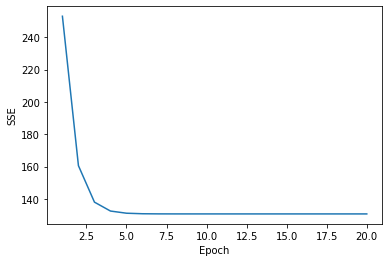

In [9]:
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()

In [10]:
from lin_regplot import lin_regplot

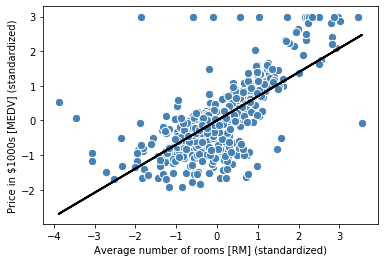

In [11]:
lin_regplot(X_std, y_std, lr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')
plt.show()

In [12]:
num_rooms_std = sc_x.transform([[5.0]])
price_std = lr.predict(num_rooms_std)
print("Price in $1000s: %.3f" % sc_y.inverse_transform(price_std))

Price in $1000s: 10.840


In [13]:
print('Slope: %.3f' % lr.w_[1])

Slope: 0.695


In [14]:
print('Intercept: %.3f' % lr.w_[0])

Intercept: -0.000
